## Load libraries and define cleaning function

In [5]:
from spacy.language import Language
import re
@Language.component("clean_text")
def clean_text(doc):
    '''
    Returns a cleaned spacy document for the pipeline
    
    Arguments:
        doc: piece of text to be cleaned
    Returns:
        A new document that has a cleaned version of the text
    '''
    text = doc.text
    # Remove non ascii characters
    text = text.encode("UTF-8", "ignore")
    text = text.decode()
    
    text = text.strip() # Remove spaces at the begining and end of sentences   
    text = text.lower() # Lowercase all data
    # text = re.sub(r'\n', r'. ', text)
    # text = re.sub(r'([ \.?!])+', r'\1', text) # Remove repeated punctuation, spaces, line breaks

    text = re.sub(r'\n', r'. ', text)
    text = re.sub(r'([ \.?!])+', r'\1', text) # Remove repeated punctuation, spaces, line breaks
    text = re.sub(r'(\w+)([\.?!])(\w+)', r'\1\2 \3', text) # Separate words joined by a punctuation sign
    text = re.sub(r'[\r\t]', '', text) # Remove words that start with a backslash

    text = re.sub(r'[\r\t]', '', text) # Remove words that start with a backslash

    text = re.sub(r'(?:http|ftp|https)://(?:[\w_-]+(?:(?:\.[\w_-]+)+))(?:[\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '', text) # Remove links
    text = re.sub(r'\[.*?\]', '', text) # remove text in square brackets

    text = re.sub(r'<.*?>+', '', text) # remove everything between <>
    text = re.sub(r'{.*?}+', '', text) # remove everything between {}
    text = re.sub(r'\(.*?\)+', '', text) # remove everything between ()
    
    # text = re.sub(r'\w*\d\w*', r'', text) # remove words containing digits
    
    text = re.sub(r"""[^a-z\s\d.,\/#!$%\^&\*;:{}=\-_`~()"']""", '', text) # remove anything that is not a letter or a space
    return nlp.make_doc(text)

## Process EU data

### Clean text files and join in a json with metadata

In [6]:
import spacy
import os
# Instantiate the pipeline, disable ner component for perfomance reasons
nlp = spacy.load("en_core_web_sm", disable=["lemmatizer", "ner"])

# Add custom text cleaning function
nlp.add_pipe('clean_text')
nlp.add_pipe('sentencizer')

in_folder = '../data/01_crawled/eu_data/text/'

nlp.max_length  = max([len(open(f'{in_folder}{file}', 'r', encoding="UTF-8").read())+1 for file in os.listdir(in_folder) if file[0]!='.'])
eu_texts = (open(f'{in_folder}{file}', 'r', encoding="UTF-8").read() for file in os.listdir(in_folder) if file[0]!='.')

#open(f'../data/02_preprocessed/full_eu_text.txt', 'w').close()
with open(f'../data/02_preprocessed/full_eu_text.txt', 'wb') as f:
    for doc in nlp.pipe(eu_texts, n_process=8):
        for sent in doc.sents:
            # Write only sentences that have at least 30 tokens
            if len(sent.text.split(' ')) >= 10:
                f.write(f'{sent}\n'.encode('UTF-8'))

### Statistics on the ammount of text

In [ ]:
text = open(f'../data/02_preprocessed/full_eu_text.txt', 'r').read()
n_sentences = len(open(f'../data/02_preprocessed/full_eu_text.txt', 'r').readlines())
n_tokens = len(text.split(' '))
n_sentences, n_tokens

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Generate the wordclou12
wordcloud = WordCloud(width = 1200, height = 800,
                background_color ='black',
                min_font_size = 10).generate(text)

# plot the WordCloud image                       
plt.figure(figsize = (12, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title(f'Word cloud of training data with {n_tokens} tokens')
plt.show()

## Process US data

### Clean text files and join in a json with metadata

In [12]:
import spacy
import os
# Instantiate the pipeline, disable ner component for perfomance reasons
#nlp = spacy.blank("en_core_web_sm", disable=["lemmatizer", "ner"])
nlp = spacy.blank("en")

# Add custom text cleaning function
nlp.add_pipe('clean_text')
nlp.add_pipe("sentencizer")
    
in_folder = '../data/01_crawled/us_data/text/'

nlp.max_length  = max([len(open(f'{in_folder}{file}', 'r', encoding="UTF-8").read())+1 for file in os.listdir(in_folder) if file[0]!='.'])
texts = (open(f'{in_folder}{file}', 'r', encoding="UTF-8").read() for file in os.listdir(in_folder) if file[0]!='.')

#open(f'../data/02_preprocessed/full_us_text.txt', 'w').close()
with open(f'../data/02_preprocessed/full_us_text.txt', 'wb') as f:
    for doc in nlp.pipe(texts, n_process=8):
        for sent in doc.sents:
            # Write only sentences that have at least 30 tokens
            if len(sent.text.split(' ')) >= 10:
                f.write(f'{sent}\n'.encode('UTF-8'))

### Statistics on the ammount of text

In [13]:
text = open(f'../data/02_preprocessed/full_us_text.txt', 'r').read()
n_sentences = len(open(f'../data/02_preprocessed/full_us_text.txt', 'r').readlines())
n_tokens = len(text.split(' '))
n_sentences, n_tokens

(7057, 1524896)

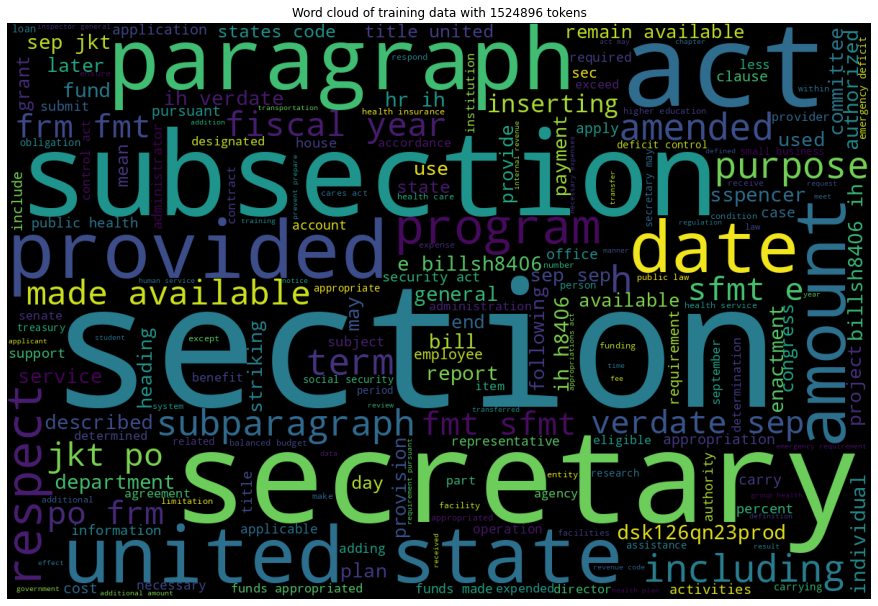

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Generate the wordclou12
wordcloud = WordCloud(width = 1200, height = 800,
                background_color ='black',
                min_font_size = 10).generate(text)

# plot the WordCloud image                       
plt.figure(figsize = (12, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title(f'Word cloud of training data with {n_tokens} tokens')
plt.show()